# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.156619e+01     7.988151e+00
 * time: 0.004655122756958008
     1     2.834287e+01     4.559318e+00
 * time: 0.02098393440246582
     2     2.008195e+01     5.066927e+00
 * time: 0.04061698913574219
     3     1.268679e+01     2.598017e+00
 * time: 0.060090065002441406
     4     1.074534e+01     1.061272e+00
 * time: 0.0800330638885498
     5     9.963579e+00     1.609213e+00
 * time: 0.09675097465515137
     6     9.549190e+00     1.249948e+00
 * time: 0.1139991283416748
     7     9.160392e+00     8.810782e-01
 * time: 0.23758196830749512
     8     8.789818e+00     7.998868e-01
 * time: 0.2526431083679199
     9     8.528706e+00     7.331754e-01
 * time: 0.2675909996032715
    10     8.279611e+00     5.066933e-01
 * time: 0.2825319766998291
    11     8.124421e+00     5.816961e-01
 * time: 0.29769110679626465
    12     8.017925e+00     5.695443e-01
 * time: 0.31252503395080566
    13     7.970078e+00     6.545507e-01
 * time: 0.

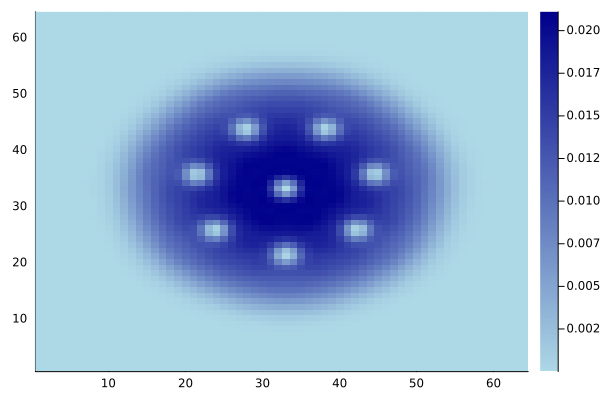

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)